In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from Final_Project import *
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

## Introduction

Publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). 

We will use lending data from 2007-2010.

The source is https://www.kaggle.com/datasets/itssuru/loan-data

## Data description

- **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose**: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
- **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- **installment**: The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico**: The FICO credit score of the borrower.
- **days.with.cr.line**: The number of days the borrower has had a credit line.
- **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Read the Data and delete Null values

In [2]:
data = pd.read_csv('loan.csv')
data.isnull().value_counts()

credit.policy  purpose  int.rate  installment  log.annual.inc  dti    fico   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid
False          False    False     False        False           False  False  False              False      False       False           False        False    False             9578
dtype: int64

## What data types we are using

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Replase credit policy data into Bool format

In [4]:
# data.columns = [c.replace(".", "_") for c in data.columns]
data["credit.policy"] = data["credit.policy"].astype("bool") # 1 - True , the customer meets the credit policy
data["not.fully.paid"] = data["not.fully.paid"].astype("bool") # 0 - False, the customer doesn't meet the credit policy
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,True,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,True,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,True,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,True,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,True,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False


## The common info about whole loans 

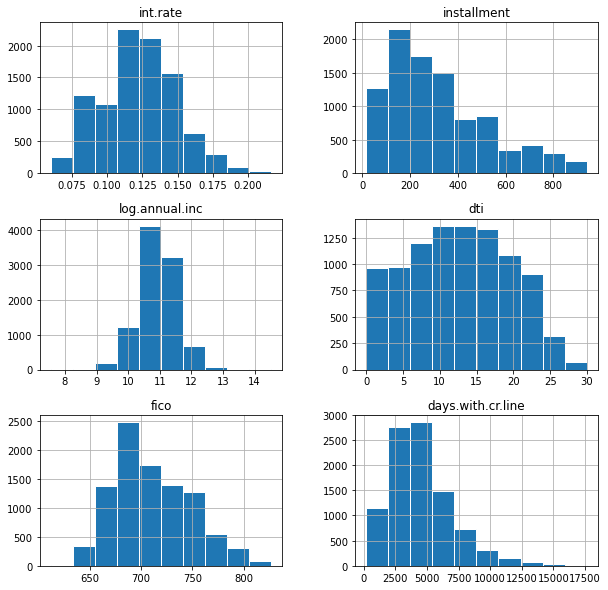

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330


In [5]:
numbers = data.select_dtypes(['int64', 'float64']).columns
num_list = numbers.to_list()
for i in range(5):
    num_list.pop()

data[num_list].hist(figsize=(10,10), edgecolor='white')
plt.show()

data[num_list].describe()

## Correlation matrix for loans parameters

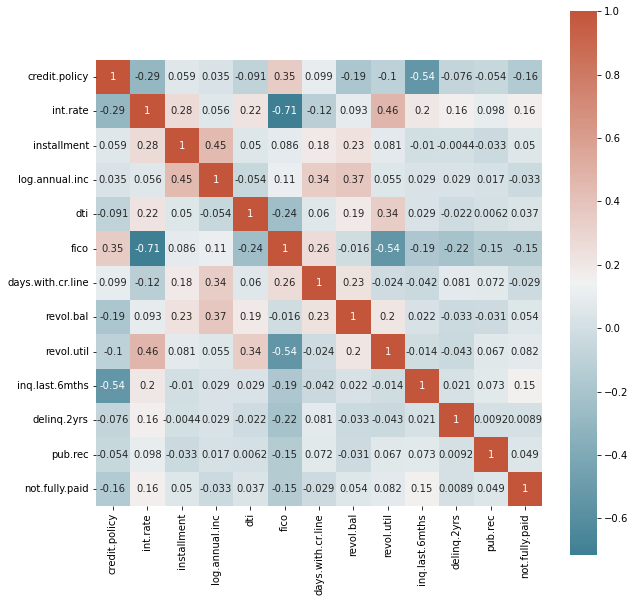

In [6]:
#data.corr()
cor_mat= data.corr()
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

### The perfect correlation with "not fully paid" loans shows "credit policy", "Interest rate", "inq.last 6 months" and "fico" rating. 

# The most purpose of the loans

Text(0.5, 0.98, 'Purpose of Loans')

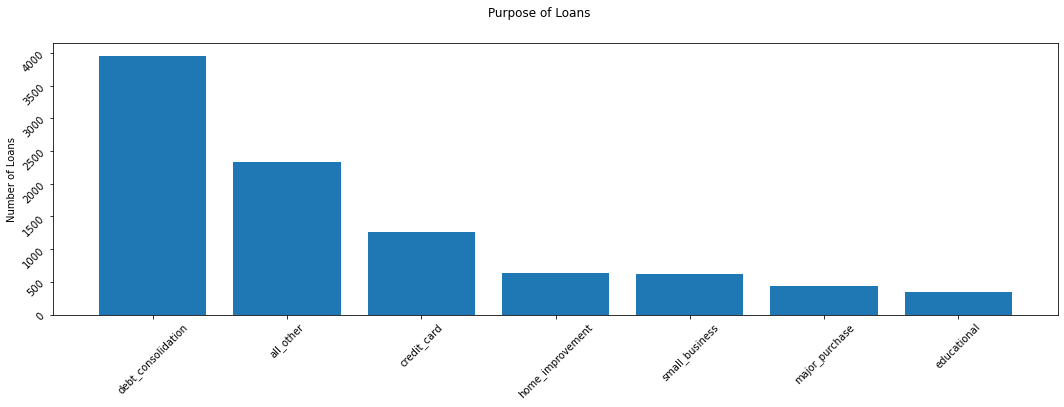

In [7]:
purpose = data['purpose'].value_counts().reset_index()
names = list(purpose['index'])
values = list(purpose['purpose'])

# plot
fig, axs = plt.subplots(figsize=(18, 5), sharey=True)
axs.bar(names, values)
axs.set_ylabel('Number of Loans')
axs.tick_params(labelrotation=45)
fig.suptitle('Purpose of Loans')

# sns.countplot(x='purpose', data=data, hue='not.fully.paid')



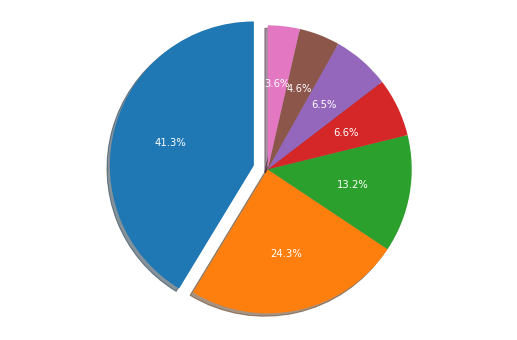

In [8]:
# table with %
cat = data.select_dtypes('object').columns
table = pd.DataFrame(data[cat[0]].value_counts())
table.rename(columns={'purpose':'count'}, inplace=True)
table['%'] = np.round((table['count']/table['count'].sum()) * 100, 2)
table

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = values
sizes = table['%']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(sizes, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color':"w"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### As You cann see the "debt consolidation" and loans for "other" purpose are almost **66%** of the total. The most risk of the loan notpaying is getting obiously from here

# Some more detailed information about loans pool

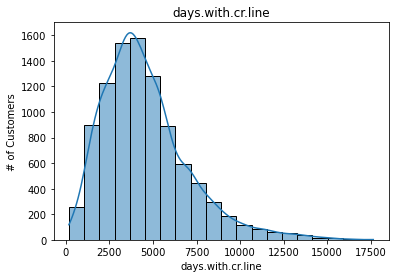

In [9]:
days_with_cr_line = data['days.with.cr.line'].reset_index()
x = days_with_cr_line['days.with.cr.line'].to_list()

sns.histplot(x='days.with.cr.line',data= data, kde=True,bins = 20)
plt.xlabel('days.with.cr.line')
plt.ylabel('# of Customers')
plt.title('days.with.cr.line')
plt.show()

### The majour term of the credir line is bw 1000 and 6000 days, which is 3 and 16 years

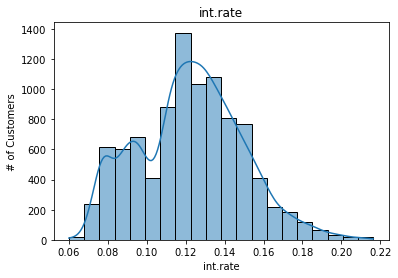

In [10]:
sns.histplot(x='int.rate',data= data, kde=True,bins = 20)
plt.xlabel('int.rate')
plt.ylabel('# of Customers')
plt.title('int.rate')
plt.show()

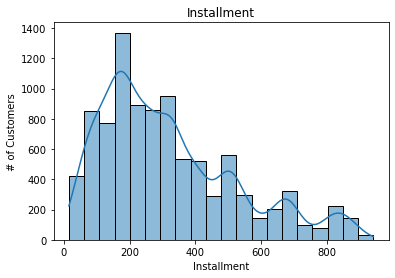

In [11]:
numbers = data['installment'].values.tolist()
sns.histplot(x='installment',data= data, kde=True,bins = 20)
plt.xlabel('Installment')
plt.ylabel('# of Customers')
plt.title('Installment')
plt.show()

### The most installments are bw  \\$100 and \\$400 per month. 

# Average Interest rate vs Credit.policy

Text(0.5, 0.98, 'Average Interest rate vs Credit.policy')

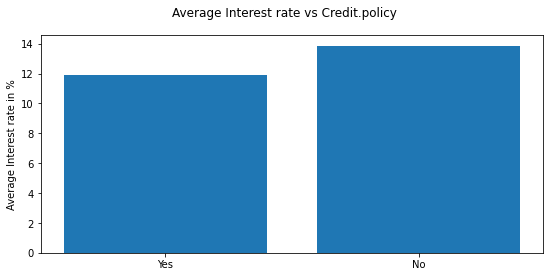

In [12]:
labels = ['Yes', 'No']
rate_aver = [get_average('credit.policy', 1, 'int.rate') * 100, get_average('credit.policy', 0, 'int.rate') * 100]
fig, axs = plt.subplots(figsize=(9, 4), sharey=True)
axs.bar(labels, rate_aver)
axs.set_ylabel('Average Interest rate in %')
fig.suptitle('Average Interest rate vs Credit.policy')

### The interest rate of the loans which meet the Credit policy (12%) is almost 15% higher than overwise (14%).

# Average FICO Rating for loans wich meet or not the Credit Policy

Text(0.5, 0.98, 'Average FICO Rating for loans wich meet or not the Credit Policy')

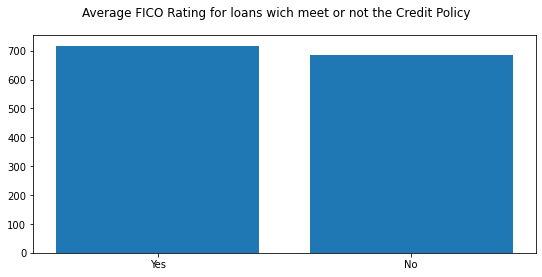

In [13]:
labels = ['Yes', 'No']
rate_aver = [get_average('credit.policy', 1, 'fico'), get_average('credit.policy', 0, 'fico')]
fig, axs = plt.subplots(figsize=(9, 4), sharey=True)
axs.bar(labels, rate_aver)
fig.suptitle('Average FICO Rating for loans wich meet or not the Credit Policy')

### Fico rating is almost the same for the loans which meet the Credit Policy (730) and for the loans which not meet the Credit Policy (680)

# Average Interest rate vs Loan Status

Text(0.5, 0.98, 'Average Interest rate vs Loan Status')

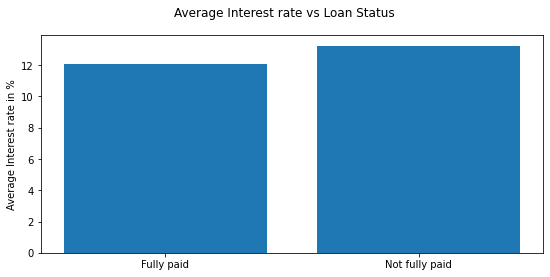

In [14]:
labels = ['Fully paid', 'Not fully paid']
rate_aver = [get_average('not.fully.paid', 0, 'int.rate') * 100, get_average('not.fully.paid', 1, 'int.rate') * 100]
fig, axs = plt.subplots(figsize=(9, 4), sharey=True)
axs.bar(labels, rate_aver)
axs.set_ylabel('Average Interest rate in %')
fig.suptitle('Average Interest rate vs Loan Status')

### The interest rate of the not paid loans (about 13.3%) is 10% higher in comparison to paid loans (about 12%)

# Amount of "Fully paid loans" vs "Not fully paid loans"

   index  not.fully.paid
0  False            8045
1   True            1533


Text(0.5, 0.98, 'Fully paid loan vs Not fully paid loan')

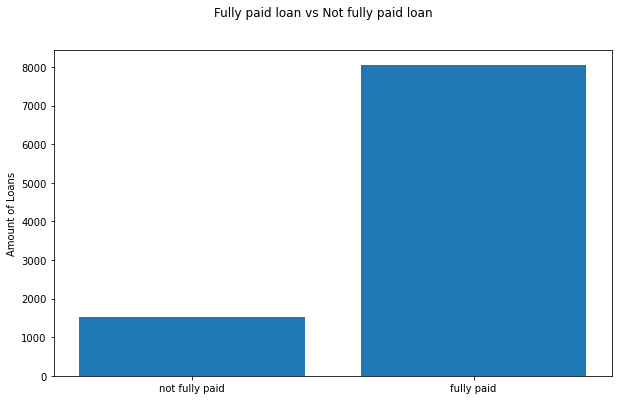

In [15]:
names = ['not fully paid', 'fully paid']
not_paid = data['not.fully.paid'].value_counts().reset_index()
print(not_paid)
values = [not_paid.loc[1]['not.fully.paid'], not_paid.loc[0]['not.fully.paid']]
fig, axs = plt.subplots(figsize=(10, 6))
axs.bar(names, values)
axs.set_ylabel('Amount of Loans')
fig.suptitle('Fully paid loan vs Not fully paid loan')

### Not fully paid loans are 16% of the whole amount of loans

# Fico Scores of Customers

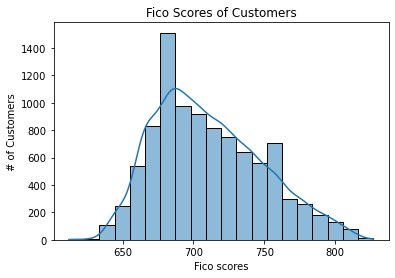

In [16]:
fico = data['fico'].reset_index()
x = fico['fico'].to_list()
sns.histplot(x='fico',data= data, kde=True,bins = 20)
plt.xlabel('Fico scores')
plt.ylabel('# of Customers')
plt.title('Fico Scores of Customers')
plt.show()

### The majour amount of the customers have scores bw 670 and 750.

# The comparison of the loans attribute for 'not.fully.paid' loans and 'fully.paid' Loans

In [17]:
numbers = data.select_dtypes(['int64', 'float64']).columns
data.groupby('not.fully.paid')[numbers].agg(['mean', 'std'])

int.rate           installment             log.annual.inc  \
                    mean       std        mean         std           mean   
not.fully.paid                                                              
False           0.120770  0.026692  314.574123  203.398688      10.941091   
True            0.132452  0.025495  342.785114  223.948527      10.885023   

                                dti                  fico             ...  \
                     std       mean       std        mean        std  ...   
not.fully.paid                                                        ...   
False           0.604045  12.494413  6.855020  713.326911  38.223723  ...   
True            0.666718  13.195838  7.006769  697.828441  33.756808  ...   

                   revol.bal               revol.util             \
                        mean           std       mean        std   
not.fully.paid                                                     
False           16122.724425  29637.645740  45.759608  28.891285   
True            21066.293542  49905.689359  52.255075  29.057906   

               inq.last.6mths           delinq.2yrs             pub.rec  \
                         mean       std        mean       std      mean   
not.fully.paid                                                            
False                1.433934  1.999009    0.161591  0.550974  0.056557   
True                 2.330724  2.933480    0.174821  0.520562  0.091324   

                          
                     std  
not.fully.paid            
False           0.255537  
True            0.292659  

[2 rows x 22 columns]

# The comparison of the loans with different purpose.

In [18]:
data.groupby('purpose')[numbers].agg(['mean', 'std'])

int.rate           installment             log.annual.inc  \
                        mean       std        mean         std           mean   
purpose                                                                         
all_other           0.116771  0.027152  244.937542  184.272991      10.845313   
credit_card         0.119738  0.024906  319.500713  198.228995      11.047230   
debt_consolidation  0.126595  0.024769  358.984390  198.309002      10.912909   
educational         0.119907  0.026551  217.547201  168.505475      10.549956   
home_improvement    0.117507  0.026889  337.071590  222.108670      11.201979   
major_purchase      0.114171  0.027445  243.483913  179.320592      10.844895   
small_business      0.138087  0.031191  433.826607  248.585838      11.146216   

                                    dti                  fico             ...  \
                         std       mean       std        mean        std  ...   
purpose                                                                   ...   
all_other           0.660981  11.079498  7.099443  715.344058  40.059548  ...   
credit_card         0.568385  14.099398  6.474297  709.626783  35.590267  ...   
debt_consolidation  0.547477  14.076462  6.433460  703.871367  34.397778  ...   
educational         0.759202  11.344927  6.939110  708.282799  38.365188  ...   
home_improvement    0.592289  10.197504  6.775213  724.806041  43.561991  ...   
major_purchase      0.644325  10.159886  6.630960  722.503432  41.098429  ...   
small_business      0.632436  10.793296  6.932821  719.988691  37.768905  ...   

                       revol.bal               revol.util             \
                            mean           std       mean        std   
purpose                                                                
all_other           12883.039897  31770.912348  39.712321  29.347922   
credit_card         23180.020602  33636.249864  53.600475  27.149591   
debt_consolidation  17146.710639  24167.207708  54.125504  26.715131   
educational         10828.897959  23042.339207  38.801166  29.866897   
home_improvement    17328.756757  34249.738350  34.274626  27.980053   
major_purchase       7281.453089  11189.595841  32.457895  27.101806   
small_business      27581.203554  76740.161344  40.070436  30.081828   

                   inq.last.6mths           delinq.2yrs             pub.rec  \
                             mean       std        mean       std      mean   
purpose                                                                       
all_other                1.646504  2.284179    0.179751  0.588037  0.048048   
credit_card              1.387480  2.138266    0.151347  0.508526  0.072108   
debt_consolidation       1.461461  2.059245    0.163255  0.561788  0.070508   
educational              1.854227  2.416265    0.157434  0.450791  0.043732   
home_improvement         1.941176  2.357001    0.136725  0.448354  0.066773   
major_purchase           1.562929  2.181826    0.173913  0.568239  0.048055   
small_business           1.933764  2.481741    0.155089  0.474446  0.056543   

                              
                         std  
purpose                       
all_other           0.229404  
credit_card         0.314137  
debt_consolidation  0.262854  
educational         0.204796  
home_improvement    0.279887  
major_purchase      0.295186  
small_business      0.238051  

[7 rows x 22 columns]

# Aggregate grafs for the 'not.fully.paid' loans and the 'fully.paid' Loans

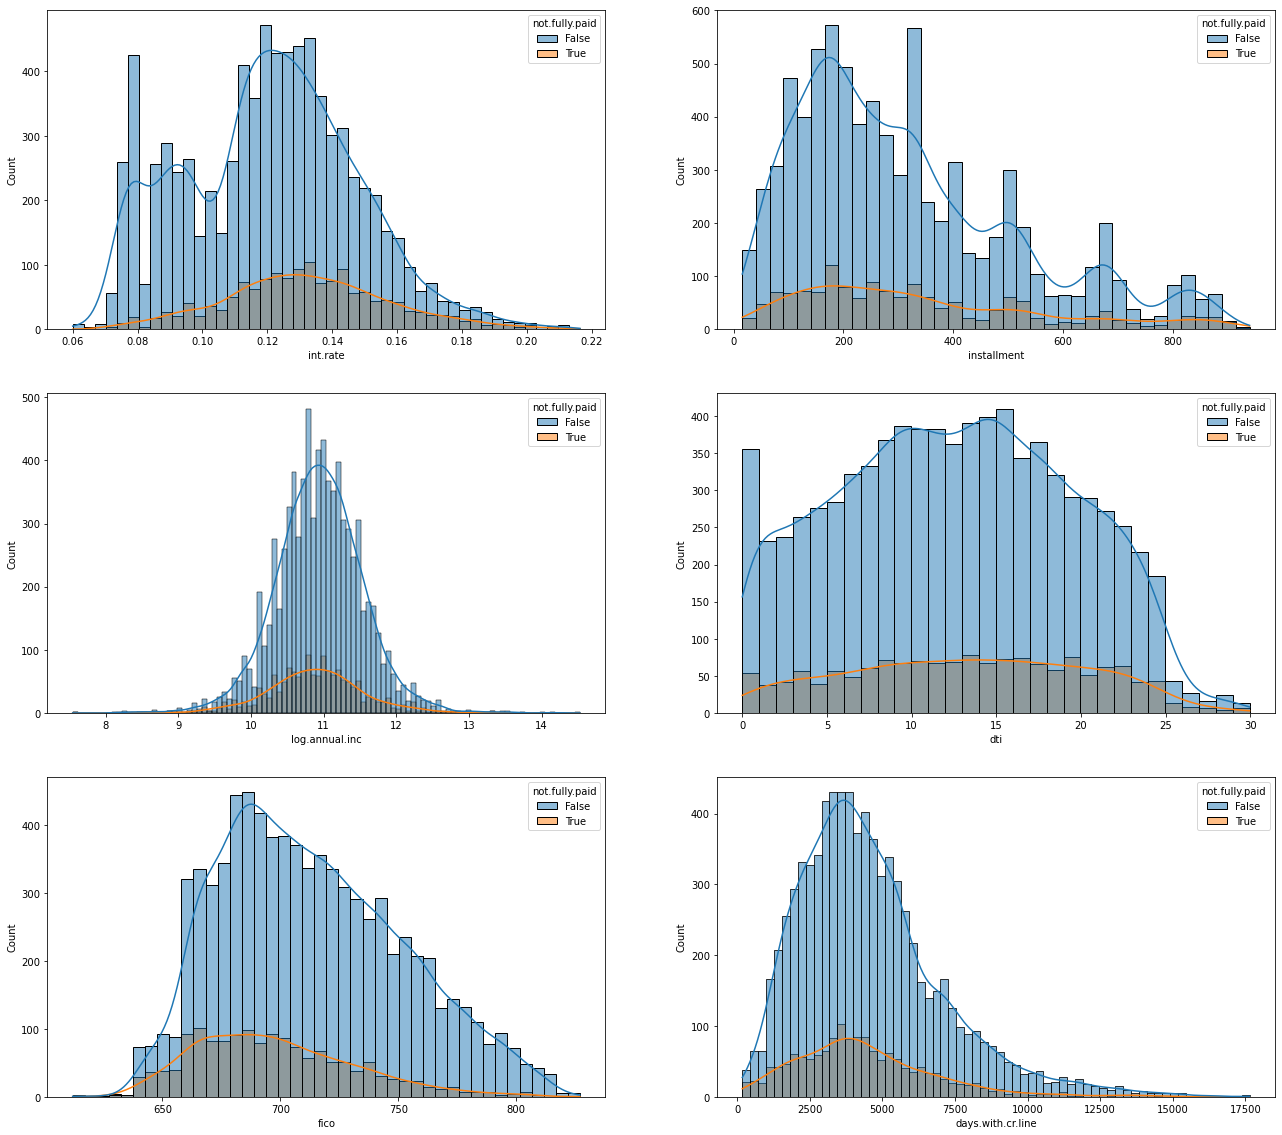

In [19]:
fig, ax = plt.subplots(3,2, figsize=(22,20))
ax=ax.ravel()
count=0
for i in num_list:
    sns.histplot(data=data, x=i, hue='not.fully.paid', kde=True, ax=ax[count])
    count+=1

### The max of the 'fico' rating of the 'not.fully.paid' loans is at the lower numbers but interest rate at the higher interest rate numbers. 

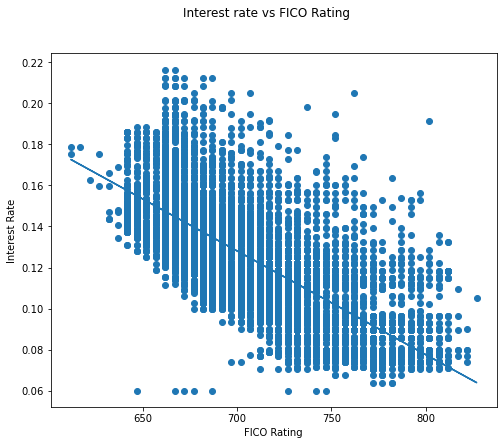

Correlation between "FICO Rating" and "Interest rate" of the loans  = -71.48%.


In [20]:
fico = data['fico'].reset_index()
int_rate = data['int.rate'].reset_index()
names = list(fico['fico'])
values = list(int_rate['int.rate'])

slope, intercept, r, p, std_err = stats.linregress(names, values)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

fig, axs = plt.subplots(figsize=(8, 6.5), sharey=True)
axs.scatter(names, values)
plt.plot(x, mymodel)
axs.set_ylabel('Interest Rate')
axs.set_xlabel('FICO Rating')
fig.suptitle('Interest rate vs FICO Rating')
plt.show()
r *= 100
print(f'Correlation between "FICO Rating" and "Interest rate" of the loans  = {"%.2f" % r}%.')

In [26]:
from sklearn import linear_model
features = ['dti', 'fico', 'installment', 'days.with.cr.line', 'int.rate', 'credit.policy', 'log.annual.inc']
X = data[[features[0], features[1], features[-1]]]
y = data['int.rate']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

predicted_int_rate = (regr.predict([[10, 700, 10]])) * 100 # dti = 10, fico = 700, log.annual.inc = 10

print(f'Predicted interest rate = {"%.2f" % predicted_int_rate}%.')

Predicted interest rate = 12.18%.


#### Now using linear model, we can predict at what interest rate get the customer loan with given features ('dti' = 10, 'fico' = 700, 'log.annual.inc' = 10)

# Let's traine our model and get the info whether loan will be fully paid, or we get another unpaid loan. 

In [29]:
dtree = DecisionTreeClassifier()
X = data[features]
y = data['not.fully.paid']
dtree = dtree.fit(X.values, y)

In [30]:
# for prediction - features = ['dti', 'fico', 'installment', 'days.with.cr.line', 'int.rate', 'credit.policy', 'log.annual.inc']
def paid_or_not_paid(info: bool, sets: dict):
    if info:
        return f'The loan with {sets} will NOT be fully paid'
    else:
        return f'The loan with {sets} will be fully paid'
    

set1 = {'dti': 10, 'fico': 800, 'installment': 300, 'days.with.cr.line': 1000, 'int.rate': 0.06, 'credit.policy': 1, 'log.annual.inc': 11}
set2 = {'dti': 13, 'fico': 650, 'installment': 500, 'days.with.cr.line': 1000, 'int.rate': 0.16, 'credit.policy': 0, 'log.annual.inc': 10}

info = dtree.predict([[set1['dti'], set1['fico'], set1['installment'], set1['days.with.cr.line'], set1['int.rate'], set1['credit.policy'], set1['log.annual.inc']]])
print(paid_or_not_paid(info, set1))

info = dtree.predict([[set2['dti'], set2['fico'], set2['installment'], set2['days.with.cr.line'], set2['int.rate'], set1['credit.policy'], set2['log.annual.inc']]])
print(paid_or_not_paid(info, set2))

The loan with {'dti': 10, 'fico': 800, 'installment': 300, 'days.with.cr.line': 1000, 'int.rate': 0.06, 'credit.policy': 1, 'log.annual.inc': 11} will be fully paid
The loan with {'dti': 13, 'fico': 650, 'installment': 500, 'days.with.cr.line': 1000, 'int.rate': 0.16, 'credit.policy': 0, 'log.annual.inc': 10} will be fully paid


## Check the Accuracy of the Decision Tree

In [31]:
# 70 % for Train and 30% for test
var_train, var_test, res_train, res_test = train_test_split(data[features], data['not.fully.paid'], test_size = 0.3)
dtree = dtree.fit(var_train, res_train)
score = (dtree.score(var_test, res_test)) * 100
print(f'Accuracy of the Decision Tree = {"%.2f" % score}%.')

Accuracy of the Decision Tree = 72.51%.


### Accuracy is not too high,  but it't the issue for the next step.